In [0]:
import pandas as pd
import numpy as np
import os

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams
import nltk

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.metrics import classification_report,confusion_matrix

from collections import defaultdict
from collections import Counter
plt.style.use('ggplot')
stop=set(stopwords.words('english'))

import re
from nltk.tokenize import word_tokenize

import gensim
import string

from tqdm import tqdm
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM,Dense, SpatialDropout1D, Dropout
from keras.initializers import Constant
from keras.optimizers import Adam

In [0]:
df = pd.read_csv('lowercase_no_url_stopwords_special_words_lemmatized_data.csv')
df.head()
df.shape

(5802, 2)

In [0]:
df = df.replace(r'^\s*$', np.nan, regex=True)
from string import digits
df['length']=1
for i in range(5802):
    df['text'][i]= str(df['text'][i])
    length = len(df['text'][i])
    df['length'][i] = length 
df.head()

/home/rufan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/rufan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,label,text,length
0,1,michael brown suspect rob store shot say police,47
1,1,police chief say officer shot brown know robbery,48
2,1,report police beat wrong suspect charge get bl...,62
3,1,basically pd hijack suppose press conference d...,86
4,1,report police beat wrong suspect charge get bl...,62


In [0]:
train = df


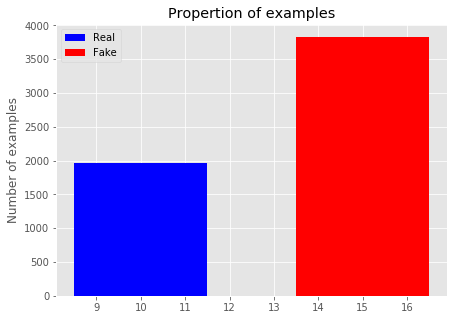

In [0]:
Real = train[train['label'] == 1].shape[0]
Fake = train[train['label'] == 0].shape[0]
plt.rcParams['figure.figsize'] = (7, 5)
plt.bar(10,Real,3, label="Real", color='blue')
plt.bar(15,Fake,3, label="Fake", color='red')
plt.legend()
plt.ylabel('Number of examples')
plt.title('Propertion of examples')
plt.show()

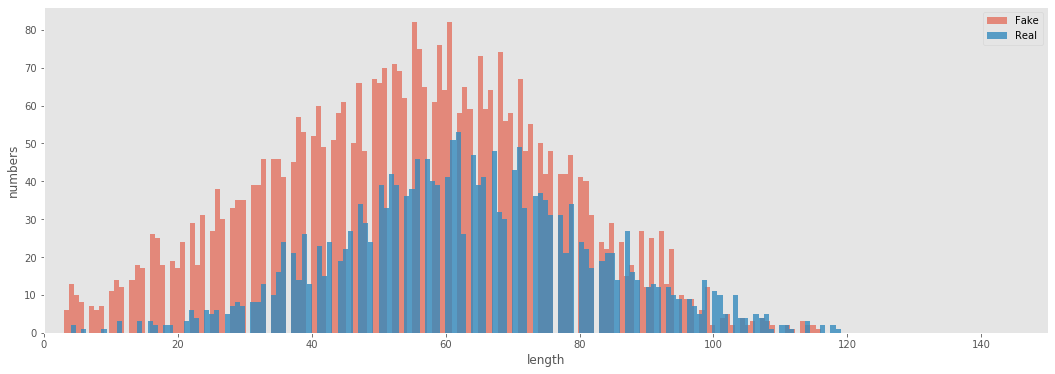

In [0]:
plt.rcParams['figure.figsize'] = (18.0, 6.0)
bins = 150
plt.hist(train[train['label'] == 0]['length'], alpha = 0.6, bins=bins, label='Fake')
plt.hist(train[train['label'] == 1]['length'], alpha = 0.8, bins=bins, label='Real')
plt.xlabel('length')
plt.ylabel('numbers')
plt.legend(loc='upper right')
plt.xlim(0,150)
plt.grid()
plt.show()

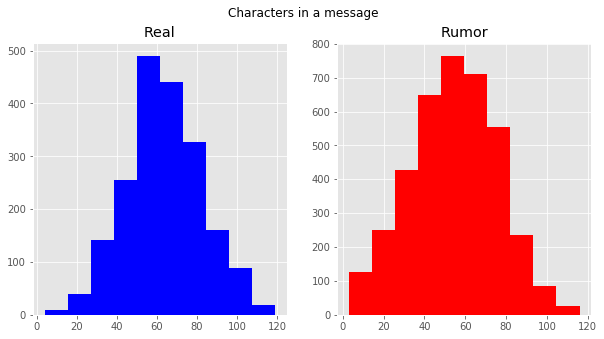

In [0]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
train_len=train[train['label']==1]['text'].str.len()
ax1.hist(train_len,color='blue')
ax1.set_title('Real')
train_len=train[train['label']==0]['text'].str.len()
ax2.hist(train_len,color='red')
ax2.set_title('Rumor')
fig.suptitle('Characters in a message')
plt.show()

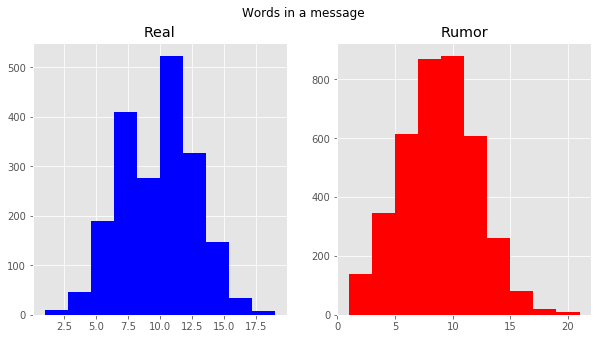

In [0]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
train_len=train[train['label']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(train_len,color='blue')
ax1.set_title('Real')
train_len=train[train['label']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(train_len,color='red')
ax2.set_title('Rumor')
fig.suptitle('Words in a message')
plt.show()

In [0]:
def create_corpus(label):
    corpus=[]
    
    for x in train[train['label']==label]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

In [0]:
def create_corpus_df(train, label):
    corpus=[]
    
    for x in train[train['label']==label]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

In [0]:
corpus=create_corpus(0)

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]
np.array(stop)

array({'over', 'have', 'll', "don't", 'hasn', 'some', 'should', 'not', 're', 'yourself', 'into', 'where', "couldn't", 'any', 'yours', "won't", 'from', 'both', "haven't", 'mustn', 'myself', 'its', 'so', 'my', 'those', 'are', 'and', 'himself', 'doesn', 'your', "needn't", 'up', 'a', 'o', 'very', 'he', "hadn't", 'such', 'themselves', 'between', 'his', 'with', 'me', 'after', 'under', 's', "shouldn't", 'ours', 'our', "didn't", 'then', 'had', 'her', 'further', "you've", 'hadn', "wouldn't", 'does', 'won', 'how', 'off', 'was', 'for', "hasn't", 'weren', 'do', 'before', 've', 'couldn', 'is', 'if', 'above', 'ma', 'shan', 'doing', 'will', 'during', 'down', 'they', "you'll", 'theirs', 'don', 'that', 'ain', 'other', 'yourselves', "that'll", 'as', 'nor', 'below', 'd', 'than', 'the', 'here', 'whom', "doesn't", 'too', 'at', 'most', 'just', 'herself', 'needn', 'what', 'no', 'own', "mightn't", 'it', "you'd", 'were', 'about', 'in', 'by', 'again', 'them', "it's", 'can', 'against', "should've", "aren't", 'th

<BarContainer object of 3 artists>

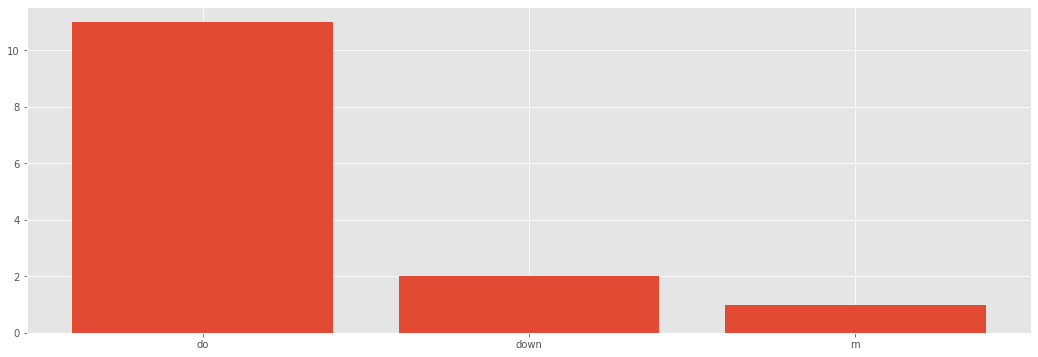

In [0]:
plt.rcParams['figure.figsize'] = (18.0, 6.0)
x,y=zip(*top)
plt.bar(x,y)

<BarContainer object of 4 artists>

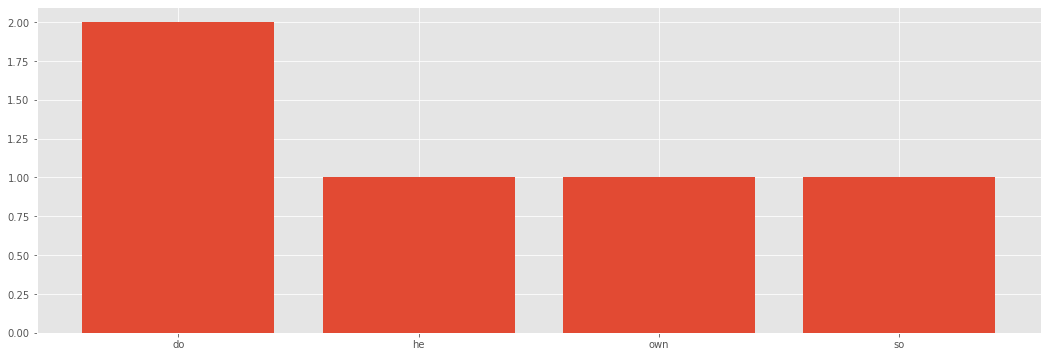

In [0]:
corpus=create_corpus(1)

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]
plt.rcParams['figure.figsize'] = (18.0, 6.0)
x,y=zip(*top)
plt.bar(x,y)

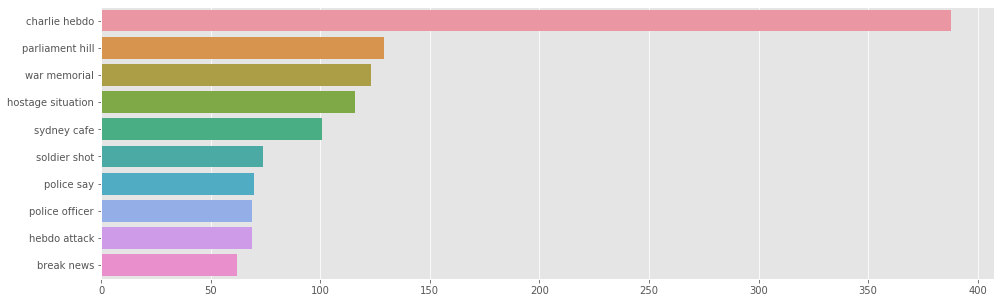

In [0]:
def get_top_message_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

plt.figure(figsize=(16,5))
top_message_bigrams=get_top_message_bigrams(train['text'])[:10]
x,y=map(list,zip(*top_message_bigrams))
sns.barplot(x=y,y=x)

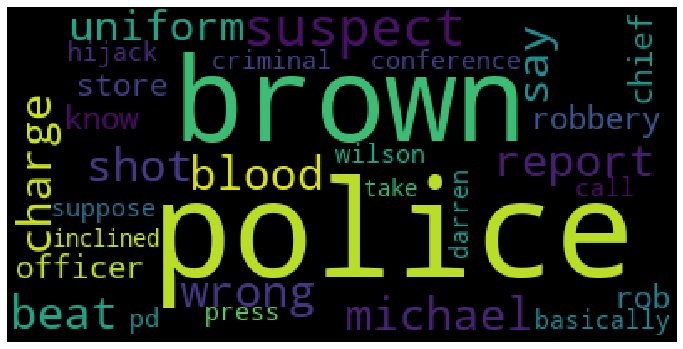

In [0]:
corpus_new1=create_corpus_df(train,1)
plt.figure(figsize=(12,8))
word_cloud = WordCloud(
                          background_color='black',
                          max_font_size = 80
                         ).generate(" ".join(corpus_new1[:50]))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

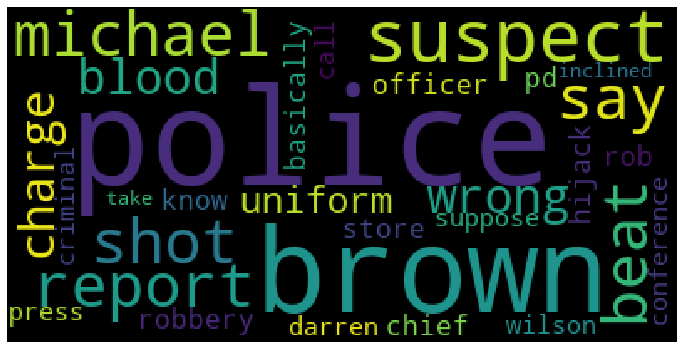

In [0]:
corpus_new0=create_corpus_df(train,0)
plt.figure(figsize=(12,8))
word_cloud = WordCloud(
                          background_color='black',
                          max_font_size = 80
                         ).generate(" ".join(corpus_new1[:50]))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

In [0]:
def cv(data):
    count_vectorizer = CountVectorizer()

    emb = count_vectorizer.fit_transform(data)

    return emb, count_vectorizer

list_corpus = train["text"].tolist()
list_labels = train["label"].tolist()

X_train, X_test, y_train, y_test = train_test_split(list_corpus, list_labels, test_size=0.2, random_state=10)

X_train_counts, count_vectorizer = cv(X_train)
X_test_counts = count_vectorizer.transform(X_test)

In [0]:
def tfidf(data):
    tfidf_vectorizer = TfidfVectorizer()

    train = tfidf_vectorizer.fit_transform(data)

    return train, tfidf_vectorizer

X_train_tfidf, tfidf_vectorizer = tfidf(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [0]:

def create_corpus_new(df):
    corpus=[]
    for tweet in tqdm(df['text']):
        words=[word.lower() for word in word_tokenize(tweet)]
        corpus.append(words)
    return corpus   
corpus=create_corpus_new(train)

100%|██████████| 5802/5802 [00:00<00:00, 9794.06it/s]


In [0]:
embedding_dict={}
with open('/home/rufan/Downloads/BT5153/glove.6B.100d.txt','r') as f:
    for line in f:
        values=line.split()
        word = values[0] 
        vectors=np.asarray(values[1:],'float32')
        embedding_dict[word]=vectors
f.close()

In [0]:
MAX_LEN=50
tokenizer_obj=Tokenizer()
tokenizer_obj.fit_on_texts(corpus)
sequences=tokenizer_obj.texts_to_sequences(corpus)

message_pad=pad_sequences(sequences,maxlen=MAX_LEN,truncating='post',padding='post')

In [0]:
word_index=tokenizer_obj.word_index
print('Number of unique words:',len(word_index))

Number of unique words: 5356


In [0]:
num_words=len(word_index)+1
embedding_matrix=np.zeros((num_words,100))

for word,i in tqdm(word_index.items()):
    if i < num_words:
        emb_vec=embedding_dict.get(word)
        if emb_vec is not None:
            embedding_matrix[i]=emb_vec 

100%|██████████| 5356/5356 [00:00<00:00, 434150.67it/s]


In [0]:
message_pad[0][0:]

array([  86,   73,   16, 1808,  188,   15,    5,    1,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0], dtype=int32)

In [0]:
model=Sequential()

embedding=Embedding(num_words,100,embeddings_initializer=Constant(embedding_matrix),
                   input_length=MAX_LEN,trainable=False)

model.add(embedding)
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))


optimzer=Adam(learning_rate=3e-4)

model.compile(loss='binary_crossentropy',optimizer=optimzer,metrics=['accuracy'])

In [0]:
train_model=message_pad[:train.shape[0]]
test_model=message_pad[train.shape[0]:]
X_train,X_test,y_train,y_test=train_test_split(train_model,train['label'].values,test_size=0.2)
print('Shape of train',X_train.shape)
print("Shape of Validation ",X_test.shape)


Shape of train (4641, 50)
Shape of Validation  (1161, 50)


In [0]:
# Recomended 10-20 epochs
history=model.fit(X_train,y_train,batch_size=4,epochs=10,validation_data=(X_test,y_test),verbose=2)

Train on 4641 samples, validate on 1161 samples
Epoch 1/10
 - 38s - loss: 0.5509 - accuracy: 0.7115 - val_loss: 0.5262 - val_accuracy: 0.7054
Epoch 2/10
 - 39s - loss: 0.5052 - accuracy: 0.7516 - val_loss: 0.4768 - val_accuracy: 0.7829
Epoch 3/10
 - 39s - loss: 0.4883 - accuracy: 0.7591 - val_loss: 0.4791 - val_accuracy: 0.7890
Epoch 4/10
 - 35s - loss: 0.4828 - accuracy: 0.7750 - val_loss: 0.4594 - val_accuracy: 0.7941
Epoch 5/10
 - 28s - loss: 0.4805 - accuracy: 0.7671 - val_loss: 0.4929 - val_accuracy: 0.7562
Epoch 6/10
 - 35s - loss: 0.4681 - accuracy: 0.7856 - val_loss: 0.4371 - val_accuracy: 0.7984
Epoch 7/10
 - 32s - loss: 0.4621 - accuracy: 0.7869 - val_loss: 0.4465 - val_accuracy: 0.8010
Epoch 8/10
 - 36s - loss: 0.4438 - accuracy: 0.7951 - val_loss: 0.4301 - val_accuracy: 0.8002
Epoch 9/10
 - 39s - loss: 0.4348 - accuracy: 0.8003 - val_loss: 0.4291 - val_accuracy: 0.8010
Epoch 10/10
 - 37s - loss: 0.4275 - accuracy: 0.8020 - val_loss: 0.4318 - val_accuracy: 0.7933


In [0]:
train_pred_GloVe = model.predict(train_model)
train_pred_GloVe_int = train_pred_GloVe.round().astype('int')

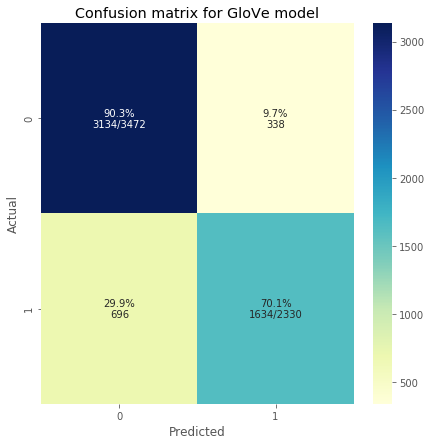

In [0]:
def plot_cm(y_true, y_pred, title, figsize=(5,5)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    plt.title(title)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
plot_cm(train_pred_GloVe_int, train['label'].values, 'Confusion matrix for GloVe model', figsize=(7,7))